# **SV564 Lecture 3 : Data Visualization in Python**
## Lectured by : Chatrphol Ovanonchai 6730084521

By Garavig Tanaksaranond

Department of Survey Engineering, Chulalongkorn University

## Introduction

library พื้นฐานสำหรับการ plot คือ Matplotlib

แต่ตัว Matplotlib เองมีฟังก์ชันพื้นฐานเท่านั้น ทำให้ใช้งานค่อนข้างยาก จึงมี library อื่น ๆ พัฒนาขึ้นมาจาก Matplotlib โดยสร้างขึ้นจาก Matplotlib

ในส่วนนี้จะใช้ library seaborn ซึ่งออกแบบตาม Semiology of Graphics (Bertin,1967)ซึ่งเป็นการมองแต่ละองค์ประกอบของกราฟ หรือ visual variables เป็นตัวแปรที่สามารถนำข้อมูลมาผูกได้ ทำให้ใช้งานง่ายกว่า Matplotlib (และสวยกว่า)

ตัวอย่างเช่น ในกรณีที่จะ plot เส้นหลาย ๆ เส้นที่แบ่งตามข้อมูล ใน Matplotlib จะต้องแยกข้อมูลแต่ละเส้นให้เป็นแต่ละคอลัมน์ แล้วถึงจะสั่ง plot

แต่ seaborn จะนำเข้าข้อมูลเป็น long format ได้เลยและสามารถกำหนดว่า สีจะให้แบ่งตามข้อมูลในคอลัมน์ใดทันที โดยสีจะเลือกมาตาม palette หรือจานสี ที่กำหนดเอาไว้

เพื่อให้เห็นความแตกต่างระหว่าง Matplotlib กับ Seaborn ในส่วนนี้จะทำการสร้างข้อมูลตัวอย่างง่าย ๆ ขึ้นมา แล้วลอง plot กราฟเส้น โดยใช้ทั้งสอง library



## 0 : Mount Google Drive First

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Matplotlib

Matplotlib จะ plot ข้อมูลลงในพื้นที่ที่เรียกว่า Figure โดยใน 1 พื้นที่นั้นอาจจะมีหลายพื้นที่กราฟย่อย ซึ่งเรียกว่า axes ได้

การสร้าง plot นั้นสร้างโดยการเรียกคำสั่ง plt.subplots() ซึ่งจะสร้างออกมาทั้ง Figure และ axes โดยเราจะต้องสร้างตัวแปรมารับ 2 ตัวนี้

<img src="https://raw.githubusercontent.com/Maplub/jupyter_pics/main/matplotlibaxes.png" width="500">

In [1]:
# matplotlib มีอยู่ใน Google Colab เรียบร้อยแล้ว จึงไม่ต้องทำการ install สามารถเรียกใช้ได้เลย
import matplotlib as mp
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
#ข้อมูลสมมติ -> d = dict
d = {'sensorname': ['a','a','a','b','b','b','c','c','c','d','d','d'] ,
     'day': [1,2,3,1,2,3,1,2,3,1,2,3] ,
     'value': [36.85, 43.5,25.1,24.1,12.3,26.4,12.5,25.6,54.2,14.2,12.2,14.7]}
df = pd.DataFrame(data=d) # show data as d (dict of data)
df # show DataFrame -> Long format

,sensorname,day,value
0,a,1,36.85
1,a,2,43.50
2,a,3,25.10
3,b,1,24.10
4,b,2,12.30
5,b,3,26.40
6,c,1,12.50
7,c,2,25.60
8,c,3,54.20
9,d,1,14.20


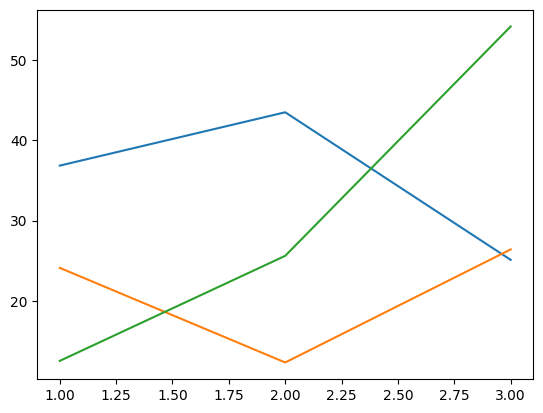

In [3]:
#ใช้ Matplotlib ทดลอง plot เส้น ทำได้โดยสร้างตัวแปร fig และ axes มารองรับ Figure และ axes ที่สร้างด้วย plt.subplots()
fig,axes = plt.subplots() # get graph template

# ในการใช้ plot เพื่อ plot เส้น จะต้องการข้อมูลทั้งของแนวแกน x และข้อมูลของแนวแกน y

# Note : เราสามารถเลือก plot ทีละเส้นได้ โดยที่
subdata_a = df[df['sensorname']=='a'] # choose value in "sensorname" only 'a'
axes.plot(subdata_a.day , subdata_a.value)

subdata_b = df[df['sensorname']=='b']
axes.plot(subdata_b.day , subdata_b.value)

subdata_c = df[df['sensorname']=='c']
axes.plot(subdata_c.day , subdata_c.value)

# Note : .values() change DataFrame to NumPy Array but doesn't affect Matplotlib plots

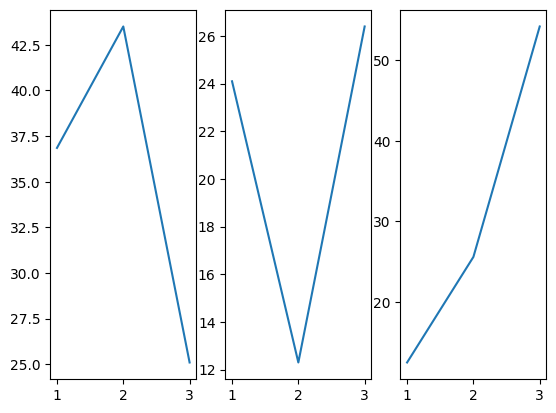

In [4]:
#เราสามารถสร้างหลาย axes ได้ โดยการกำหนดว่าจะมีรูปกี่แถว และ กี่คอลัมน์ตามลำดับ
fig,axes = plt.subplots(1,3) # มีรูปย่อย 1 แถว 3 หลัก

#ในการใช้ plot เพื่อ plot เส้น จะต้องการข้อมูลทั้งของแนวแกน x และข้อมูลของแนวแกน y
subdata = df[df['sensorname']=='a']
axes[0].plot(subdata.day , subdata.value)

subdata = df[df['sensorname']=='b']
axes[1].plot(subdata.day ,subdata.value)

subdata = df[df['sensorname']=='c']
axes[2].plot(subdata.day , subdata.value)

Text(0.5, 0, 'c')

<Figure size 900x300 with 0 Axes>

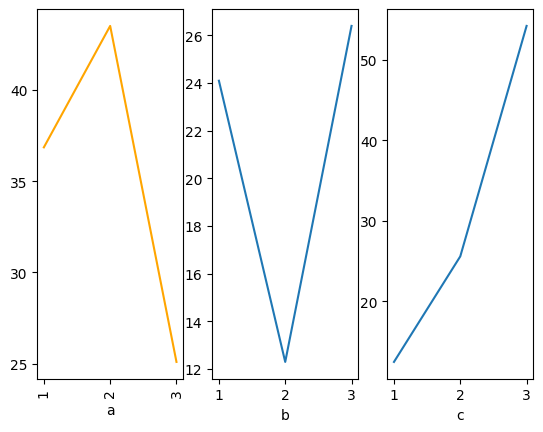

In [5]:
#การแก้ไขส่วนต่าง ๆ ของ plot เราสามารถทำการแก้พร้อมกันทั้งหมดโดยแก้ที่ rcParams หรือแก้ทีละ plot ที่แต่ละ axes ได้
plt.figure(figsize=(9, 3))
fig,axes = plt.subplots(1,3) #มีรูปย่อย 1 แถว 3 หลัก

# Set the font size
plt.rcParams['font.size'] = 16
subdata = df[df['sensorname']=='a']
axes[0].plot(subdata.day.values,subdata.value.values,color='orange')
axes[0].set_xlabel('a')
axes[0].tick_params(axis='x', labelrotation=90)

subdata = df[df['sensorname']=='b']
axes[1].plot(subdata.day.values,subdata.value.values)
axes[1].set_xlabel('b')

subdata = df[df['sensorname']=='c']
axes[2].plot(subdata.day.values,subdata.value.values)
axes[2].set_xlabel('c')

จริง ๆ แล้วเราสามารถสร้าง pivot table ขึ้นมาก่อน แล้วค่อยสั่ง plot จะง่ายกว่า

In [6]:
pivot_df = df.pivot(index='day', columns='sensorname', values='value')
# อธิบายง่ายๆ คือ ยุบ sensorname , day ให้เป็น row , column แทน (wide format)

In [7]:
pivot_df

sensorname,a,b,c,d
day,,,,
1,36.85,24.1,12.5,14.2
2,43.50,12.3,25.6,12.2
3,25.10,26.4,54.2,14.7


<Axes: xlabel='day'>

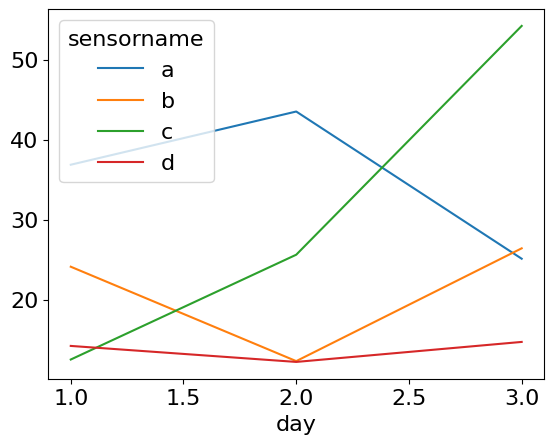

In [8]:
pivot_df.plot()

## 2. Seaborn

Text(0, 0.5, 'value (degree celcius)')

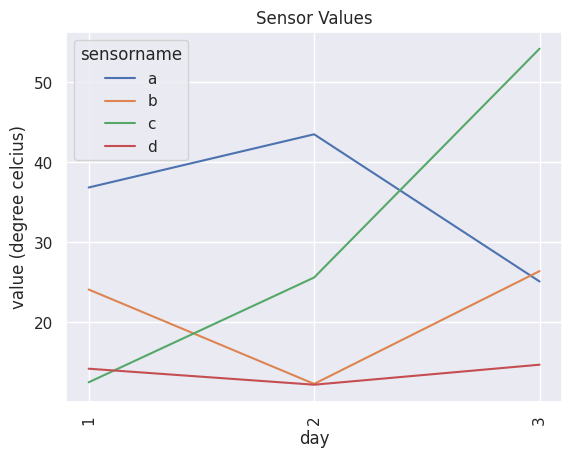

In [11]:
# seaborn ก็อยู่ใน google colab แล้ว สามารถ install ได้เลย
# เราสามารถปรับแก้รายละเอียดต่างๆใน seaborn โดยใช้ฟังก์ชันของ Matplotlib

import seaborn as sb
from matplotlib.ticker import * #ส่วนนี้ใช้ปรับ multiple locator

plt.title('Sensor Values')
sb.set_theme()

ax = sb.lineplot(x='day',y='value',hue='sensorname',data=df) # plot data

ax.xaxis.set_major_locator(MultipleLocator(1)) # set Major Locator (width = 1) -> ขีดใหญ่ใต้เเกน x
ax.tick_params(axis='x', labelrotation=90) # rotate parameter x
ax.set_ylabel('value (degree celcius)')

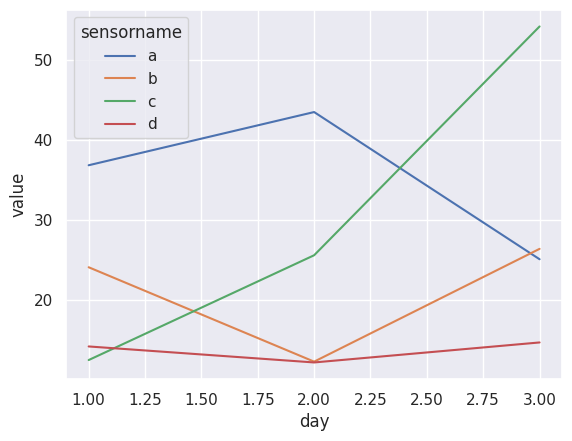

In [12]:
# plot data with seaborn
ax = sb.lineplot(x = 'day' , y = 'value' , hue = 'sensorname' , data = df) # plot x , y / color with 'sensorname' , using df as DataFrame

จะเห็นว่า seaborn ใช้งานง่ายกว่า matplotlib เยอะ
อย่างไรก็ดี เนื่องจาก seaborn พัฒนาบน matplotlib ดังนั้นเราจะสามารถใช้ฟังก์ชั่น plt. และ ax. ซึ่งเป็นของ matplotlib ปรับลักษณะต่าง ๆ ของ seaborn ได้

`seaborn` จะมี `plot` ต่างๆ ดังต่อไปนี้

plot สำหรับข้อมูลเชิงปริมาณ
* `relplot(relative plot)` เป็นการ plot ที่แสดงความสัมพันธ์ระหว่าง 2 ตัวแปร (ที่เป็นเชิงปริมาณทั้งคู่) อันได้แก่
 * `scatter plot` เป็น `default`
 * `line plot` กำหนดได้ด้วยพารามิเตอร์ `kind="line"`
* `displot(distribution plot)` เป็นการ plot ดูการกระจายของข้อมูลเชิงปริมาณ
 * `displot`
 * `kdeplot`
 * `ecdfplot`
 * `rugplot`

 และ plot สำหรับข้อมูลเชิงคุณภาพ สามารถเรียก catplot() แล้วเรียกชนิดย่อยด้วยพารามิเตอร์ kind แบ่งออกเป็นประเภทย่อยดังต่อไปนี้

* `Categorical scatterplots` แสดงข้อมูลแบบจุด:

 * `stripplot() (with kind="strip"; the default)`

 * `swarmplot() (with kind="swarm")`

* `Categorical distribution` แสดงการกระจายข้อมูลเชิงปริมาณ แบ่งกลุ่มตามข้อมูลเชิงคุณภาพ:

 * `boxplot() (with kind="box")`

 * `violinplot() (with kind="violin")`

 * `boxenplot() (with kind="boxen")`

* `Categorical estimate plots` แสดงจำนวนนับของข้อมูลเชิงคุณภาพ:

 * `pointplot() (with kind="point")`

 * `barplot() (with kind="bar")`

 * `countplot() (with kind="count")`

### ใช้ seaborn กับข้อมูลจริง

ข้อมูลจริงที่จะนำมาใช้ในที่นี้เป็นข้อมูลรายชั่วโมงของ PM2.5 ที่ได้จากเซ็นเซอร์ที่ติดตั้งอยู่ที่ตำแหน่งต่าง ๆ ในประเทศไทย

เนื่องจากข้อมูลที่โหลดมาเป็นข้อมูลดิบ มีความผิดพลาดหลาย ๆ อย่าง ดังนั้น ก่อนที่จะ plot จะทำการ clean ข้อมูลก่อนตามโค้ดด้านล่าง

In [13]:
data = pd.read_csv('https://raw.githubusercontent.com/Maplub/AirQualityData2019/master/pm25_2019_h.csv',sep=';') # seperate data with ';'
# data = DataFrame
data

,Series,Time,h,Value
0,mqttdata.mean {sensorid: },2019-05-08,15,76.285714
1,mqttdata.mean {sensorid: },2019-05-08,16,75.243665
2,mqttdata.mean {sensorid: },2019-05-08,17,73.841808
3,mqttdata.mean {sensorid: },2019-05-08,18,72.872659
4,mqttdata.mean {sensorid: },2019-05-08,19,72.472272
...,...,...,...,...
461043,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-05-28,8,NaN
461044,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-05-28,9,NaN
461045,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-05-28,10,NaN
461046,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-05-28,11,NaN


In [14]:
# Code for cleaning data
data = data[data['Series']!='mqttdata.mean {sensorid: }'] #remove rows with no sensorid
data = data[~data.Value.isnull()] #remove null value

data.Series = data.Series.str.replace('mqttdata.mean {sensorid: ','')
data.Series = data.Series.str.replace('}','')
splitresult = data.Series.str.rsplit("/", expand=True)

data['Group'] = splitresult[0]
data['Series'] = splitresult[1]

data = data[~data.Group.isnull()]
data = data[~data.Series.isnull()] #remove rows if there is no sensor id
data = data[data.Series!='undefined']

data.reset_index(inplace=True)
data.drop(columns='index',inplace=True) #ลบ column index ที่เกินมาออก

ข้อมูลที่ถูก clean เรียบร้อยจะมีหน้าตาเป็นแบบนี้

In [15]:
data.head(5)

,Series,Time,h,Value,Group
0,MCTH001,2019-04-01,7,550.208333,NDTH
1,MCTH001,2019-04-01,8,675.833333,NDTH
2,MCTH001,2019-04-01,9,799.166667,NDTH
3,MCTH001,2019-04-01,10,819.791667,NDTH
4,MCTH001,2019-04-01,11,637.916667,NDTH


### ปรับให้ใช้ภาษาไทยได้

ใช้คำสั่ง GNU wget เป็นตัวเรียกไฟล์มาจาก gihub ที่มีคนนำ font ชื่อ th sarabun new ไปใส่เอาไว้

ในการเรียกใช้คำสั่ง wget เราจะใช้ ! นำหน้า ซึ่งจะเป็นการรันคำสั่งใน command prompt

In [16]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/blob/master/fonts/thsarabunnew-webfont.ttf?raw=true

In [17]:
mp.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf?raw=true')
mp.rc('font',family='TH Sarabun New',size=12)

<Axes: xlabel='Time', ylabel='Value'>

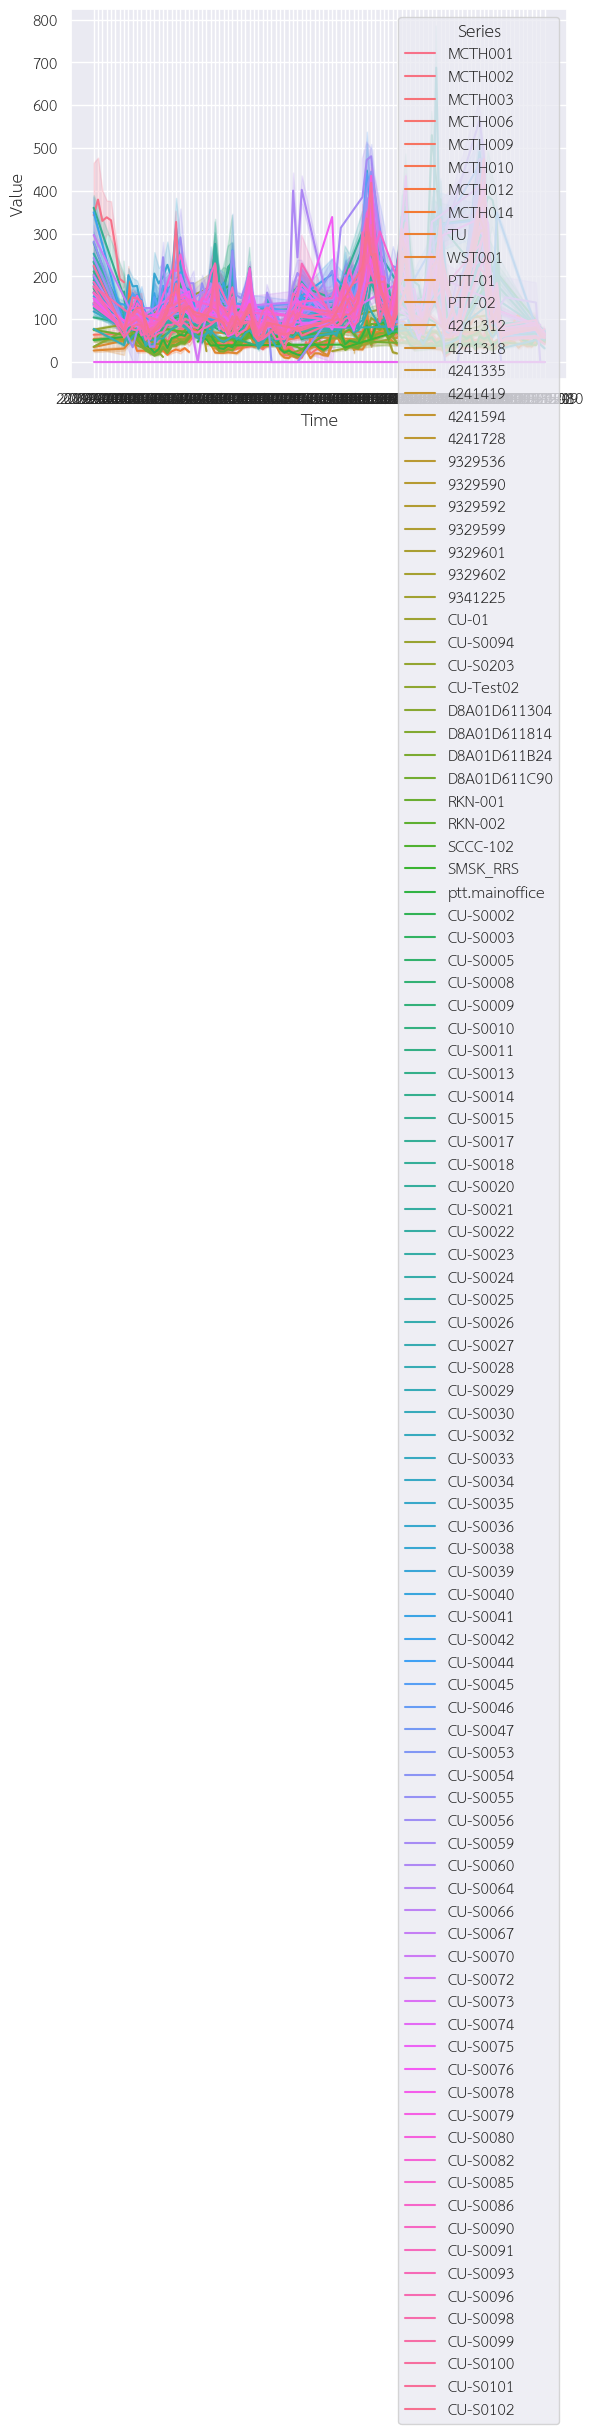

In [18]:
# Try plotting some graph
sb.lineplot(data = data , x = "Time" , y = "Value" , hue = 'Series')

### Relplot

การ plot โดยไม่ได้ระบุอะไรเลยจะเป็นการ plot กราฟเส้น โดยตัวแปรแรกคือแปน x และตัวแปรตัวที่สองคือแกน y

เราจะทำการแสดงข้อมูลเฉลี่ยรายวันเป็นกราฟ แต่เนื่องจากข้อมูลตัวอย่างเป็นข้อมูลรายชั่วโมง จึงจะทำการหาค่าเฉลี่ยรายวันก่อนแล้วจึงจะทำการ plot

In [19]:
#ถ้าไม่ใส่ as_index = False จะเป็น format ที่ไม่เป็น long format เอาไปใช้ต่อไม่ได้
aggdata = data.groupby(by=['Group','Series','Time'], as_index=False )['Value'].mean()

# group by Sensor Group , Series , Time
# get value from 'Value' column , then find mean (normally will get h calculated which we dint want)

In [20]:
aggdata

,Group,Series,Time,Value
0,NDTH,MCTH001,2019-04-01,342.904412
1,NDTH,MCTH001,2019-04-02,379.387153
2,NDTH,MCTH001,2019-04-03,329.586727
3,NDTH,MCTH001,2019-04-04,338.022412
4,NDTH,MCTH001,2019-04-05,331.085069
...,...,...,...,...
5581,nansensor,CU-S0102,2019-04-23,55.095486
5582,nansensor,CU-S0102,2019-04-24,66.245833
5583,nansensor,CU-S0102,2019-04-25,91.927500
5584,nansensor,CU-S0102,2019-05-03,74.620256


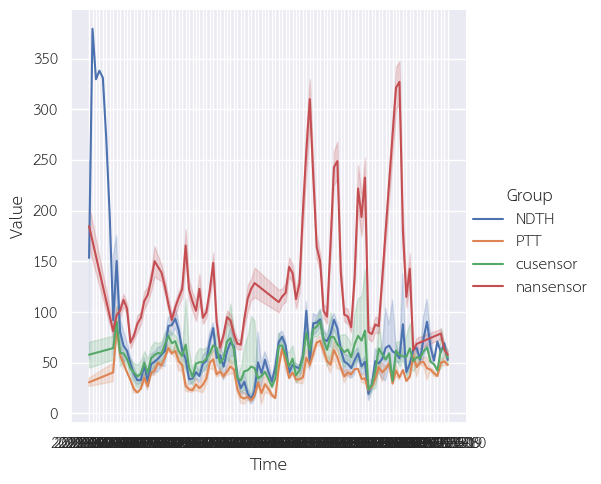

In [24]:
# Normmal Relative Plot
sb.relplot(x='Time',y='Value', hue='Group', data=aggdata , kind = "line") # relative (line) plot

<Axes: xlabel='Time', ylabel='Value'>

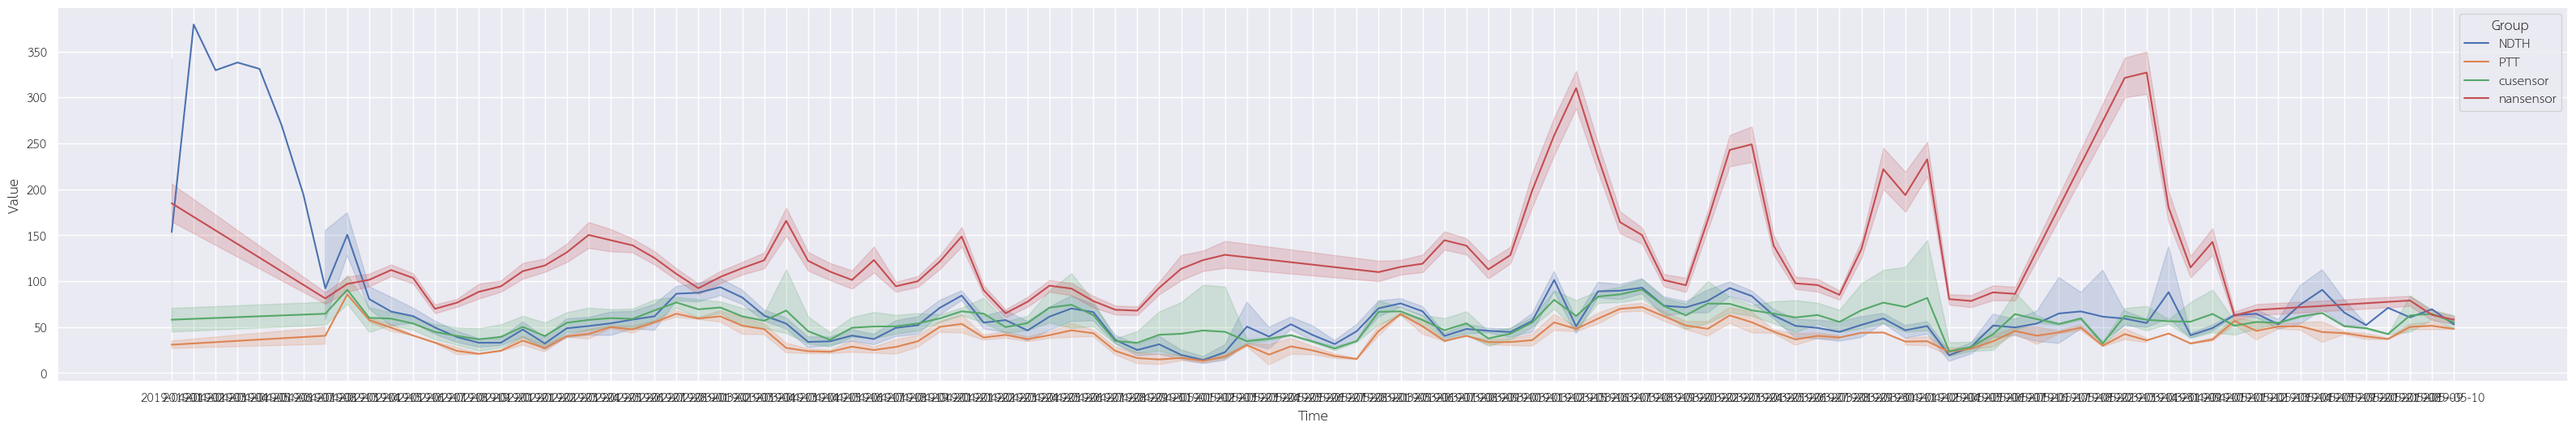

In [25]:
# Change size of Seaborn graph
fix , ax1 = plt.subplots(figsize=(40,6)) # unpack tuple into fix , ax1

# Plot Seaborn Graph (Only activated on lineplot)
sb.lineplot(x='Time',y='Value', hue='Group', data=aggdata , ax = ax1) # relative (line) plot

# Note : Seaborn สร้าง ax โดยอัตโนมัติ เราอาจจะต้องสร้าง ax1 ไว้ แล้วยัดเข้าไปใน lineplot

### Displot

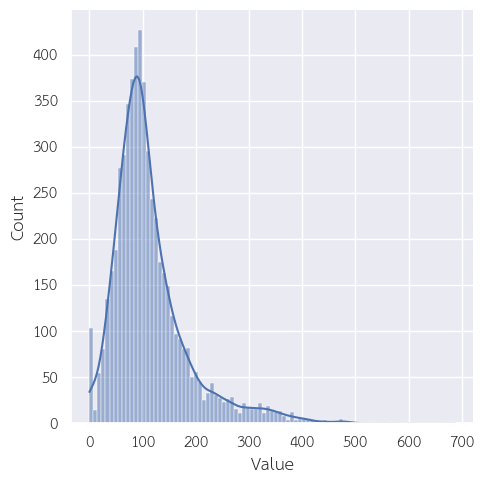

In [26]:
# Histogram
sb.displot(x='Value',data=aggdata,kde=True) # Distribution Plot

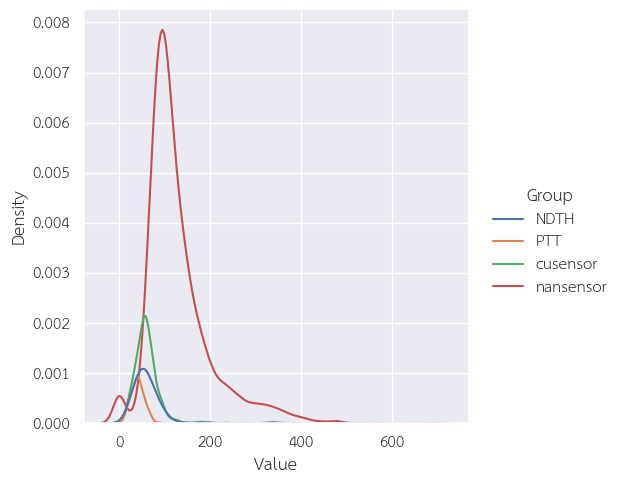

In [27]:
# KDE (krnel Density Estimation)
sb.displot(x='Value',data=aggdata,hue='Group',kind='kde')

#### Catplot (Strip plot และ Swarm plot)

จะใช้ Strip plot และ Swarm plot ในการดูว่าข้อมูลฝุ่นเฉลี่ยรายวันในแต่ละวันมีการกระจายตัวแตกต่างกันหรือไม่

เราจะเริ่มจากการนำข้อมูลที่เป็นค่าเฉลี่ยรายวันแล้วมาทำการแปลงให้เป็นวัน (จันทร์ อังคาร พุธ...)

จากนั้นแสดงข้อมูลแยกรายวันด้วย Strip plot

ส่วน Swarm plot จะเลือกข้อมูลมาแค่ 1 กลุ่มมาแสดง เนื่องจาก Swarm plot ไม่สามารถแสดงข้อมูลปริมาณมากได้

แนะนำให้ดู: https://www.youtube.com/watch?v=5e9NBhGBVwk

In [30]:
# เรียกดู DataFrame ที่เราเคยสร้างไว้ก่อนหน้านี้
aggdata

,Group,Series,Time,Value
0,NDTH,MCTH001,2019-04-01,342.904412
1,NDTH,MCTH001,2019-04-02,379.387153
2,NDTH,MCTH001,2019-04-03,329.586727
3,NDTH,MCTH001,2019-04-04,338.022412
4,NDTH,MCTH001,2019-04-05,331.085069
...,...,...,...,...
5581,nansensor,CU-S0102,2019-04-23,55.095486
5582,nansensor,CU-S0102,2019-04-24,66.245833
5583,nansensor,CU-S0102,2019-04-25,91.927500
5584,nansensor,CU-S0102,2019-05-03,74.620256


In [32]:
# เช็ค type ด้วย dtype method
aggdata.dtypes

,0
Group,object
Series,object
Time,object
Value,float64


In [33]:
# เปลี่ยน type ให้เป็น datetime64
aggdata['Time'] = pd.to_datetime(aggdata['Time'])
aggdata.dtypes() # now is datetime64 yay yay

In [41]:
# สร้าง column weekday ขึ้นมา เพื่อให้รู้ว่าเป็นวันที่เท่าไหร่ของสัปดาห์ (Monday นับเป็นวันจันทร์ index 0) โดยการใช้ method .dt.weekday ที่มีใน datetime อยู่เเล้ว
aggdata['weekday'] = aggdata['Time'].dt.weekday

In [43]:
# เรียกดู dataFrame ที่เคยสร้างไว้
aggdata

,Group,Series,Time,Value,weekday
0,NDTH,MCTH001,2019-04-01,342.904412,0
1,NDTH,MCTH001,2019-04-02,379.387153,1
2,NDTH,MCTH001,2019-04-03,329.586727,2
3,NDTH,MCTH001,2019-04-04,338.022412,3
4,NDTH,MCTH001,2019-04-05,331.085069,4
...,...,...,...,...,...
5581,nansensor,CU-S0102,2019-04-23,55.095486,1
5582,nansensor,CU-S0102,2019-04-24,66.245833,2
5583,nansensor,CU-S0102,2019-04-25,91.927500,3
5584,nansensor,CU-S0102,2019-05-03,74.620256,4


<Axes: xlabel='weekday', ylabel='Value'>

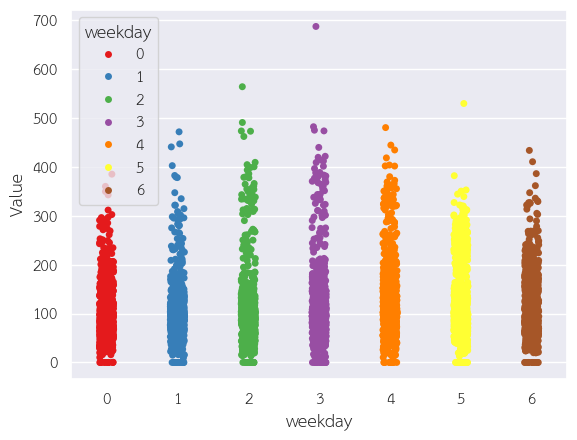

In [57]:
# plot stripplit โดยใช้ seaborn (แกน x,y,data ที่ใช้)
sb.stripplot(x="weekday", y="Value", data=aggdata , hue = "weekday" , palette = "Set1") # set hue according to weekday (ใส่สีตาม weekday)

ข้อมูลปริมาณมากไม่สามารถใช้ `swarmplot` ได้ จึงทำการกรองข้อมูลเซ็นเซอร์มาเพียงบางส่วน

<Axes: xlabel='weekday', ylabel='Value'>

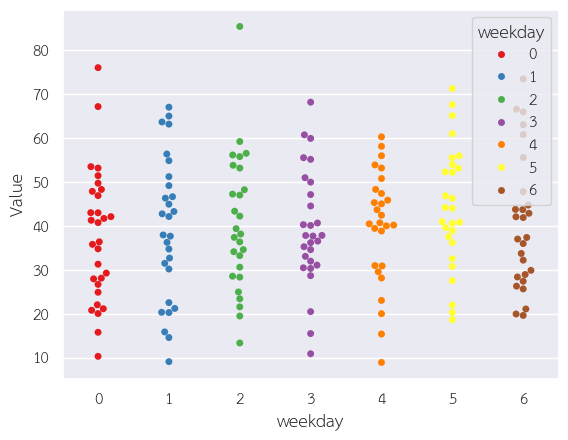

In [60]:
# ลอง plot swarmplot ด้วย seaborn โดยดึงข้อมูลมาเฉพาะ Group ที่เป็น PTT
sb.swarmplot(x="weekday", y="Value", data=aggdata[aggdata['Group']=='PTT'] , hue = "weekday" , palette = "Set1")

<Axes: xlabel='weekday', ylabel='Value'>

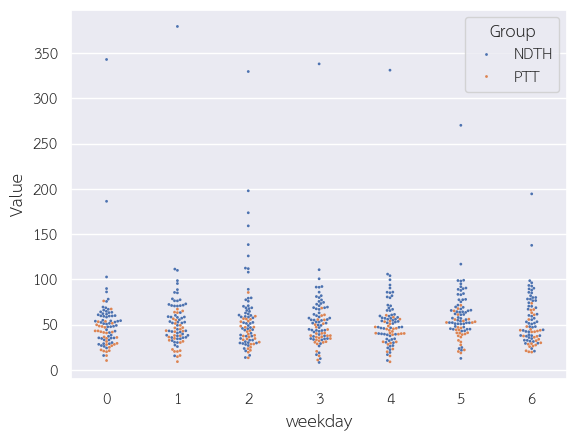

In [61]:
# ลอง plot swarmplot แยกตาาม Group sensor เอาเเค่ group ที่เป็น PTT หรือ NDTH !!!
sb.swarmplot(x="weekday", y="Value",s=2,hue='Group', data=aggdata[(aggdata['Group']=='PTT') | (aggdata['Group']=='NDTH')])

#### Boxplot & Violin plot

boxplot (box and whisker plot) มาตรฐานจะแสดงการกระจายของข้อมูลเป็น 'กล่อง' 'หนวด' และ 'จุด' โดยที่ตามปกติแล้ว
- กล่องจะแสดงช่วง Quartile 1 และ 3 ของข้อมูล โดยช่วงระหว่าง Quartile 1 และ 3 นี้มีชื่อว่า interquartile range (IQR) โดยมีขีดเส้นตรงกลางแสดง median
- หนวดล่างจะแสดงช่วงข้อมูลตั้งแต่ Quartile 1 ลงไปจนถึง Quartile 1 - IQR
- หนวดบนจะแสดงช่วงข้อมูลตั้งแต่ Quartile 3 ขึ้นไปจนถึง Quartile 3 + IQR
- ข้อมูลที่อยู่นอกขอบเขตหนวด จะแสดงด้วยจุด ซึ่งจะถือว่าเป็นข้อมูล Outlier

boxplot อาจจะแสดงค่าต่างจากนี้ก็ได้

<Axes: xlabel='weekday', ylabel='Value'>

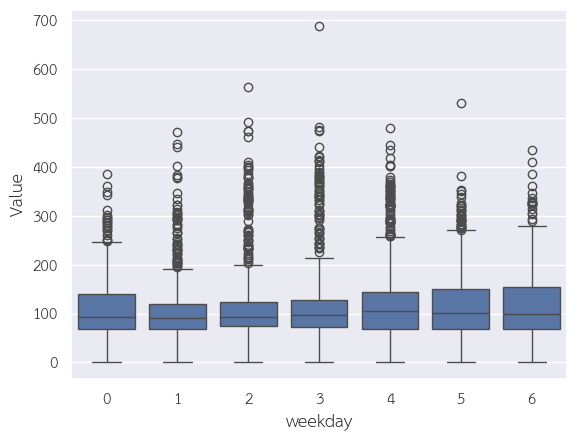

In [62]:
sb.boxplot(x="weekday", y="Value", data=aggdata)

##### Errorbar

Errorbar มีให้เลือก 4 แบบ


1.   sd standard deviation แสดง +/- 1 standard deviation
2.   se standard error
3.   pi percentile interval แสดงความกว้างของ percentile ที่กำหนด
4.   ci confidence interval


https://seaborn.pydata.org/tutorial/error_bars.html

/tmp/ipython-input-558064516.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sb.pointplot(


<Axes: xlabel='weekday', ylabel='Value'>

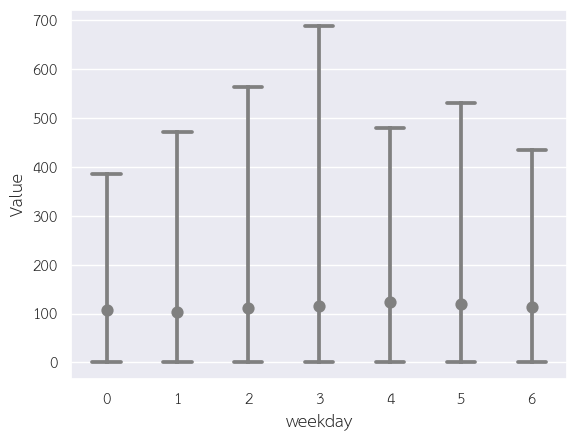

In [63]:
sb.pointplot(
    data=aggdata, x="weekday", y="Value",
    errorbar=("pi", 100), capsize=.4, join=False, color=".5",
)

### Heatmap

In [66]:
# สร้าง pivot table โดย index (row) เป็น Group , column เป็น Weekday (แยกตาม Weekday) , และค่าเป็น value โดยใช้ function หา mean
pivotweekday = aggdata.pivot_table(index='Group',columns='weekday',values='Value', aggfunc='mean')
pivotweekday

weekday,0,1,2,3,4,5,6
Group,,,,,,,
NDTH,59.089328,62.757333,67.126110,60.467821,59.097997,67.063322,62.009278
PTT,37.708656,39.340661,40.436995,39.346692,39.886743,44.304018,40.590493
cusensor,56.598232,57.624963,60.227144,58.874473,60.977973,59.487046,55.662552
nansensor,120.964814,115.752599,125.031275,131.412667,140.418609,138.245826,130.305791


<Axes: xlabel='weekday', ylabel='Group'>

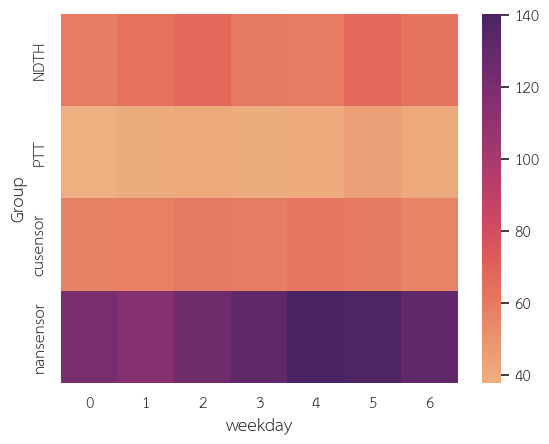

In [67]:
# plot heatmap จาก pivot table
sb.heatmap(pivotweekday,cmap=sb.color_palette("flare", as_cmap=True))

สีทั้งหมดที่มีให้เลือก https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=colormap

## 3. Altair

Altair เป็นอีก library หนึ่งที่น่าสนใจ เนื่องจากสามารถ export ออกไปเป็น Vega หรือ Vega lite ได้

Vega เป็น javascript library ที่พัฒนามาจาก D3.js

เมื่อ export ออกมาแล้วจะสามารถนำ code ไปใส่ใน HTML เพื่อเผยแพร่ได้

หลักการของ Altair
1. นำข้อมูลเข้าไปใน object Chart
2. กำหนด mark (กำหนดว่าจะเอากราฟแบบไหน) สามารถดู mark ได้ที่ https://altair-viz.github.io/user_guide/marks.html
3. encode ข้อมูลเข้าไปเป็น แกนแต่ละแกน สี และส่วนประกอบอื่นๆ
4. ใส่ฟังก์ชัน interactive เข้าไป

In [69]:
import altair as alt
# เลือก Group ที่เป็น PTT แล้ว plot graph แบบ interactive
alt.Chart(aggdata[aggdata['Group']=='PTT']).mark_circle().encode(
    x='Time',
    y='Value',
    color='weekday',
    tooltip=['Series', 'Value']
).interactive()

alt.Chart(...)

In [70]:
brush = alt.selection_interval()
alt.Chart(aggdata[aggdata['Group']=='PTT']).mark_circle().encode(
    x='Time',
    y='Value',
    color=alt.when(brush).then("weekday:O").otherwise(alt.value("grey"))
    ).add_selection(brush)

/tmp/ipython-input-3768289843.py:6: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use add_params instead.
  ).add_selection(brush)


alt.Chart(...)